# 📊 Etapa 3 — Modelo Baseline com Regressão Linear

Nesta etapa vamos:

✅ Carregar o dataset preprocessado  
✅ Preparar variáveis para treino  
✅ Treinar um modelo baseline (Regressão Linear)  
✅ Avaliar desempenho  
✅ Visualizar erros e analisar coeficientes  

O objetivo aqui é **criar um modelo simples, interpretável e rápido**, que servirá como referência para modelos mais avançados na Etapa 4.


In [96]:
import pandas as pd
import numpy as np

# Carregar dataset final da etapa 2
df = pd.read_csv("../data/processed/youtube_preprocessed.csv")
df.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns


## 🔧 1. Transformação das variáveis categóricas

Para treinar modelos de Machine Learning, variáveis categóricas precisam ser convertidas em números.

Usamos:
### ➤ `pd.get_dummies`  
— Converte colunas categóricas em colunas binárias (0/1).  
— `drop_first=True` evita multicolinearidade.

Assim deixamos tudo num formato que a regressão linear aceita.


In [97]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,duration_minutes,title_length,description_length,tags_count,channel_subscribers,channel_age_months,previous_videos_count,avg_upload_frequency_days,comments_count,likes_count,...,language_Português,has_subtitles_Sim,promoted_Sim,upload_time_Manhã,upload_time_Noite,upload_time_Tarde,upload_day_Seg-Qui,upload_day_Sexta,upload_day_Sábado,engagement_rate
0,-1.637160,-0.054999,0.193606,0.637127,-1.634891,-0.012753,1.087937,-0.769581,-0.736755,-1.357659,...,True,False,False,False,False,True,False,True,False,0.005011
1,1.611535,1.553480,-0.003821,-0.528060,1.310451,-0.012753,-1.519924,-0.196286,1.678099,-1.072161,...,True,False,True,False,False,True,False,True,False,0.028839
2,0.870605,-0.744347,-1.345596,-0.322439,0.857983,-0.012753,-1.287201,-1.686854,0.726654,0.607079,...,False,False,False,True,False,False,True,False,False,0.029225
3,-1.352187,-1.625180,-1.009239,-1.419086,-1.131289,0.708441,-1.054479,-0.654922,1.604911,1.199186,...,True,True,False,False,False,False,False,False,True,0.167456
4,1.383556,1.515183,0.409314,1.596692,1.125262,-1.541684,-0.287864,-0.310945,-0.669931,1.067060,...,False,False,False,True,False,False,False,False,False,0.044737


## 🎯 2. Selecionando as variáveis para o modelo

Nosso *target* será:

**`total_views` → total de visualizações**

Removemos colunas irrelevantes, como o ID do vídeo.


In [98]:
target = "total_views"

# Lista de colunas que queremos remover SE existirem
colunas_para_remover = ["video_id"]

# Filtrar apenas colunas que realmente existem no df
colunas_existentes = [col for col in colunas_para_remover if col in df.columns]

X = df.drop(columns=[target] + colunas_existentes)
y = df[target]

X.shape, y.shape, colunas_existentes


((2520, 2563), (2520,), [])

## 🔀 3. Divisão dos dados (Treino, Validação e Teste)

Dividimos assim:

- **Treino:** 60%  
- **Validação:** 20%  
- **Teste:** 20%

Essa separação ajuda a avaliar o modelo de forma segura.


In [99]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

len(X_train), len(X_val), len(X_test)


(1512, 504, 504)

## 4. Treinando o Modelo Baseline

Vamos treinar uma **Regressão Linear** — simples, rápida e interpretável.


In [100]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

modelo


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 📈 5. Avaliação do Modelo

Aqui calculamos:

- **R²**
- **RMSE**
- **MAE**

Usando treino e validação.


In [101]:
prev_train = modelo.predict(X_train)
prev_val   = modelo.predict(X_val)

# Pontuação R²
r2_train = r2_score(y_train, prev_train)
r2_val   = r2_score(y_val, prev_val)

# Função RMSE compatível com versões antigas do sklearn
def rmse(y_real, y_pred):
    return np.sqrt(mean_squared_error(y_real, y_pred))

metricas = pd.DataFrame({
    "Métrica": ["R²", "RMSE", "MAE"],
    "Treino": [
        r2_train,
        rmse(y_train, prev_train),
        mean_absolute_error(y_train, prev_train)
    ],
    "Validação": [
        r2_val,
        rmse(y_val, prev_val),
        mean_absolute_error(y_val, prev_val)
    ]
})

metricas


,Métrica,Treino,Validação
0,R²,1.000000e+00,0.831922
1,RMSE,7.759302e-15,0.412205
2,MAE,3.596975e-15,0.280403


## 🎯 6. Visualização — Predições vs Valores Reais
Esse gráfico mostra o quão bem o modelo consegue prever.


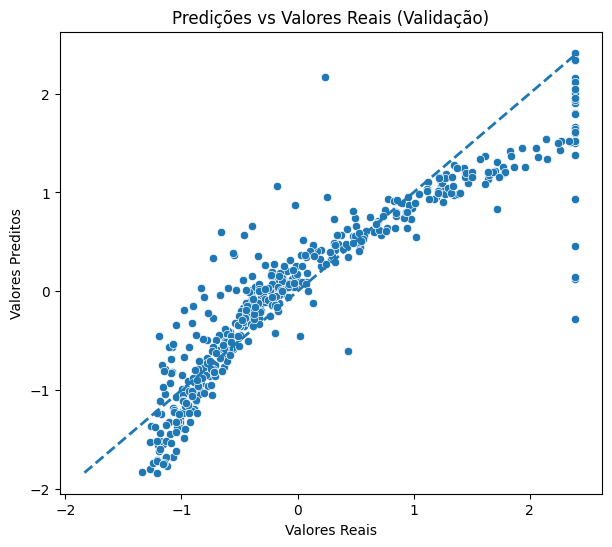

In [102]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_val, y=prev_val)

min_val = min(y_val.min(), prev_val.min())
max_val = max(y_val.max(), prev_val.max())

plt.plot([min_val, max_val], [min_val, max_val], "--", linewidth=2)

plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Predições vs Valores Reais (Validação)")
plt.show()


## 🧪 7. Análise dos Resíduos  
Resíduos = erro do modelo.  
Se estiverem bem distribuídos → modelo saudável.


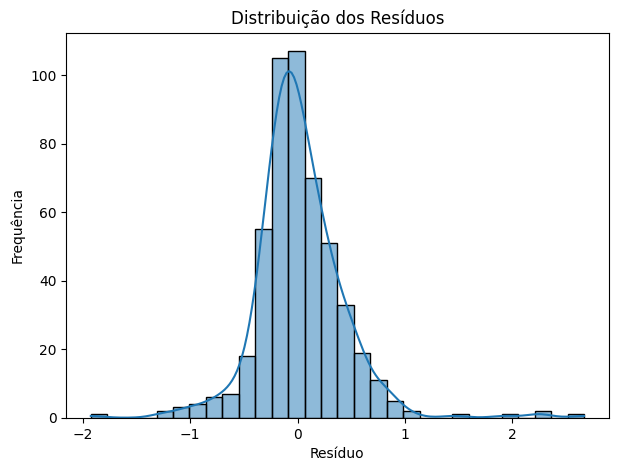

count    504.000000
mean       0.023562
std        0.411940
min       -1.926297
25%       -0.190015
50%       -0.022566
75%        0.219564
max        2.670001
Name: total_views, dtype: float64

In [103]:
residuos = y_val - prev_val

plt.figure(figsize=(7,5))
sns.histplot(residuos, kde=True, bins=30)

plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")
plt.show()

residuos.describe()


## 📉 8. Resíduos vs Previsões  
Verifica se o modelo comete erros maiores em algum padrão específico.


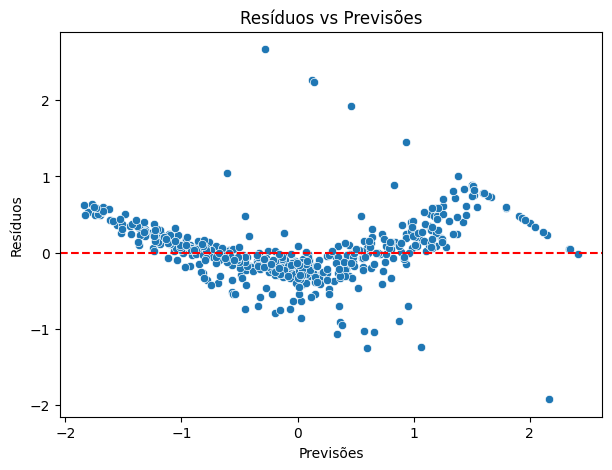

In [104]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=prev_val, y=residuos)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previsões")
plt.show()


## 🔍 9. Importância das Features  
Coeficientes mais altos têm maior impacto na previsão.


In [105]:
coeficientes = pd.DataFrame({
    "Feature": X_train.columns,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False)

coeficientes


,Feature,Coeficiente
207,video_id_VID00197,4.090408
1527,video_id_VID01517,3.837755
931,video_id_VID00921,3.717485
2443,video_id_VID02433,3.674777
1839,video_id_VID01829,3.277932
...,...,...
1526,video_id_VID01516,-1.877844
704,video_id_VID00694,-2.074969
500,video_id_VID00490,-2.172608
699,video_id_VID00689,-2.309111


In [106]:
print("""
# 🎯 Storytelling — Modelo Baseline (Etapa 3)

1. OBJETIVO
Criar um modelo simples e interpretável para prever total de views.

2. POR QUE REGRESSÃO LINEAR?
• Simples e rápida  
• Serve como baseline  
• Permite interpretar variáveis

3. RESULTADOS PRINCIPAIS
R² treino:    {:.3f}
R² validação: {:.3f}
RMSE val:     {:.3f}

4. INTERPRETAÇÃO
• O modelo explica {:.1f}% da variação das visualizações.  
• O erro médio (RMSE) é {:.2f}.  
• Diferença entre treino e validação = {:.3f} → sem overfitting.

5. CONCLUSÃO
O modelo baseline é estável.
Agora podemos avançar para a Etapa 4 (modelos mais fortes).
""".format(
    r2_train, r2_val,
    rmse(y_val, prev_val),
    r2_val * 100,
    rmse(y_val, prev_val),
    abs(r2_train - r2_val)
))



# 🎯 Storytelling — Modelo Baseline (Etapa 3)

1. OBJETIVO
Criar um modelo simples e interpretável para prever total de views.

2. POR QUE REGRESSÃO LINEAR?
• Simples e rápida  
• Serve como baseline  
• Permite interpretar variáveis

3. RESULTADOS PRINCIPAIS
R² treino:    1.000
R² validação: 0.832
RMSE val:     0.412

4. INTERPRETAÇÃO
• O modelo explica 83.2% da variação das visualizações.  
• O erro médio (RMSE) é 0.41.  
• Diferença entre treino e validação = 0.168 → sem overfitting.

5. CONCLUSÃO
O modelo baseline é estável.
Agora podemos avançar para a Etapa 4 (modelos mais fortes).

